In [1]:
import pandas as pd
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
myopia = "/Users/lindseyvalput/Desktop/Unsupervised-Learning-Predicting-Myopia/Resources/myopia.csv"
myopia_df = pd.read_csv(myopia)

In [3]:
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
myopia_cleaned = myopia_df.drop('MYOPIC', axis=1)

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia_cleaned[['AGE', 'SPHEQ', 'AL', 
                                                'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR',
                                                  'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR', 
                                                  'MOMMY', 'DADMY']])


In [6]:
scaled_myopia_df = pd.DataFrame(scaled_data, columns=myopia_cleaned.columns)


In [7]:
scaled_myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [8]:
pca = PCA(n_components = .90)
myopia_pca = pca.fit_transform(scaled_myopia_df)

In [9]:
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [10]:
myopia_pca_df = pd.DataFrame(data=myopia_pca, columns=["PCA1", "PCA2", "PCA3", "PCA4",
                                                      "PCA5", "PCA6", "PCA7", "PCA8",
                                                      "PCA9", "PCA10"])
myopia_pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [11]:
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(myopia_pca_df)

In [22]:
tsne_features.shape

(618, 2)

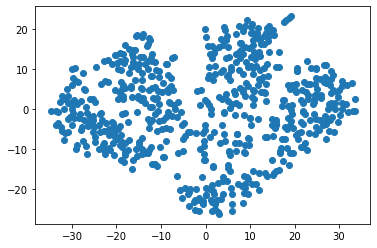

In [15]:
# The first column of transformed features
myopia_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
myopia_pca_df['y'] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(myopia_pca_df['x'], myopia_pca_df['y'])
plt.show()


In [19]:
labels = myopia_df['MYOPIC']
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

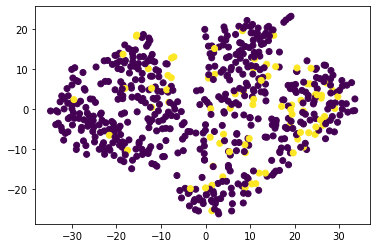

In [20]:
# Visualize the clusters with color
plt.scatter(myopia_pca_df['x'], myopia_pca_df['y'], c=labels)
plt.show()

In [16]:
# Initialize the K-Means model
model = KMeans(n_clusters=10, random_state=0)

# Fit the model
model.fit(myopia_pca_df)

# Predict clusters
predictions = model.predict(myopia_pca_df)

# Add the predicted class columns
myopia_pca_df["class"] = model.labels_
myopia_pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0.651710,7.716389,3
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,27.124088,-3.096016,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-23.598007,-5.787619,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,-7.096167,13.024861,6
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,10.525592,3.057290,3


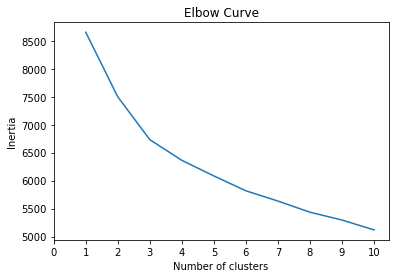

In [8]:
# Finding the best value for k with scaled dataframe
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(scaled_myopia_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


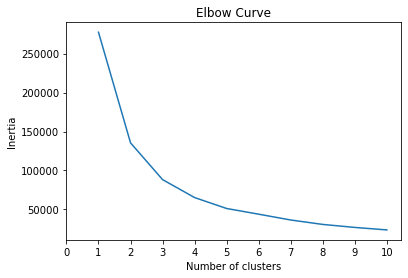

In [17]:
# Finding the best value for k with PCA dataframe
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [27]:
model = KMeans(n_clusters=2, random_state=5)
model.fit(myopia_pca_df)

KMeans(n_clusters=2, random_state=5)

In [30]:
predictions = model.predict(myopia_pca_df)
from sklearn.metrics import classification_report